In [9]:
import pandas as pd
pd.set_option("display.max_columns", None)

print("VS Code Notebook Ready ✅")



VS Code Notebook Ready ✅


In [8]:
import pandas as pd

df = pd.read_csv("../data/raw/annex1.csv")
df.head()


,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables


In [10]:
df.shape


(251, 4)

In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    int64 
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


In [12]:
df.isnull().sum()


Item Code        0
Item Name        0
Category Code    0
Category Name    0
dtype: int64

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Item Code      251 non-null    int64 
 1   Item Name      251 non-null    object
 2   Category Code  251 non-null    int64 
 3   Category Name  251 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.0+ KB


#“Annex 1 is a reference/master dataset used to standardize item and category information for analytical workflows.”

#Data Cleaning

In [14]:
# Make a clean copy
df_clean = df.copy()

# Standardize column names
df_clean.columns = (
    df_clean.columns
    .str.lower()
    .str.replace(" ", "_")
)

df_clean.head()


,item_code,item_name,category_code,category_name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables


#Columns now become:

item_code

item_name

category_code

category_name

In [15]:
df_clean.to_csv("../data/processed/annex1_cleaned.csv", index=False)


STEP 4: Basic EDA

In [16]:
df_clean["category_name"].value_counts()


category_name
Flower/Leaf Vegetables         100
Edible Mushroom                 72
Capsicum                        45
Aquatic Tuberous Vegetables     19
Solanum                         10
Cabbage                          5
Name: count, dtype: int64

Which categories dominate the catalog?

it has MORE items than other categories
Inventory focus is uneven

Some categories are over-represented

Some categories may need:

expansion

deeper analysis

strategic review

Even without sales data, this is a valid structural insight.

#Over 68% of items belong to just two categories, indicating high category concentration.”
#(100 + 72 = 172 out of 251)

#Visualization

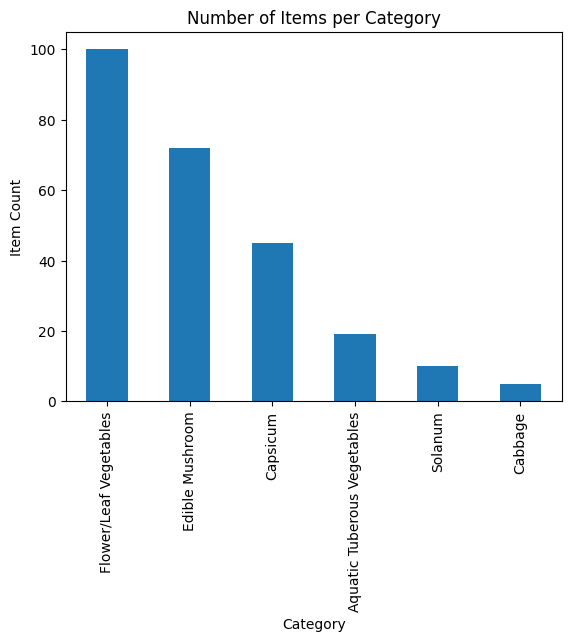

In [17]:
import matplotlib.pyplot as plt

df_clean["category_name"].value_counts().plot(kind="bar")
plt.title("Number of Items per Category")
plt.xlabel("Category")
plt.ylabel("Item Count")
plt.show()
